In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#2.Load Dataset
df = pd.read_csv('AB_NYC_2019.csv') 

In [4]:
# 3. Ensure Data Completeness and Accuracy
print("Dataset Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

Dataset Shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

In [5]:
# Drop columns with too many missing values
df = df.drop(columns=['name', 'host_name', 'last_review'])

# Fill missing reviews per month with 0
df['reviews_per_month'].fillna(0, inplace=True)

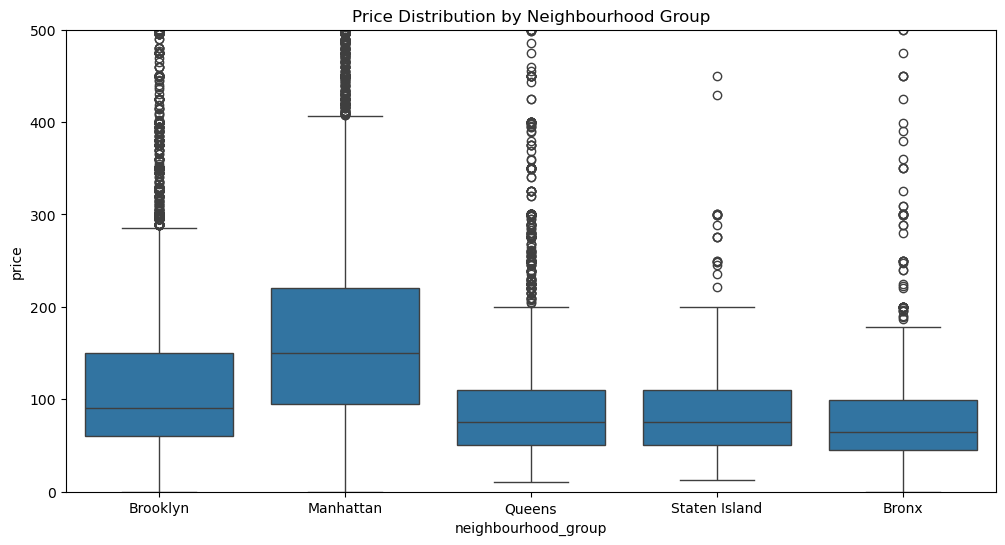

In [6]:
# 4. Data Exploration
# Price variations by neighbourhood group and room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0, 500)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

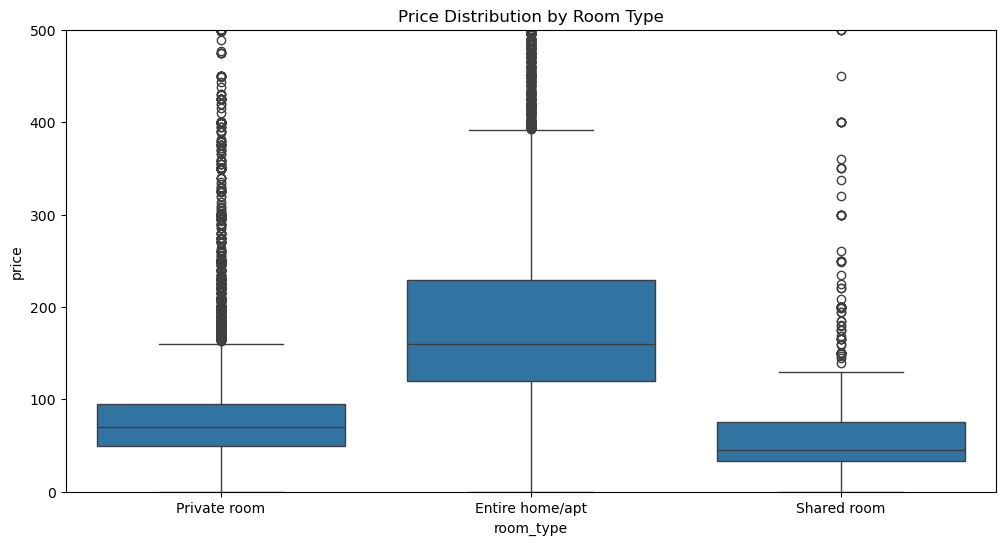

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title('Price Distribution by Room Type')
plt.show()

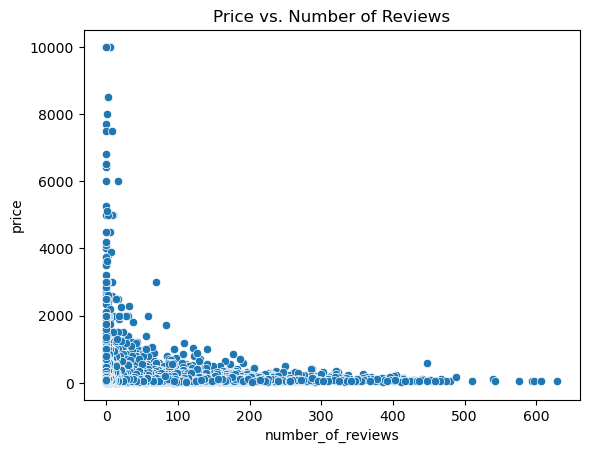

                   number_of_reviews     price
number_of_reviews           1.000000 -0.047954
price                      -0.047954  1.000000


In [8]:
#Analysis of Customer Reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs. Number of Reviews')
plt.show()
print(df[['number_of_reviews', 'price']].corr())

In [9]:
df = df[df['price'] < 500]

In [10]:
# Convert categorical features into numerical (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [11]:
# Drop non-relevant or redundant columns
df_encoded.drop(columns=['id', 'host_id', 'neighbourhood'], inplace=True)

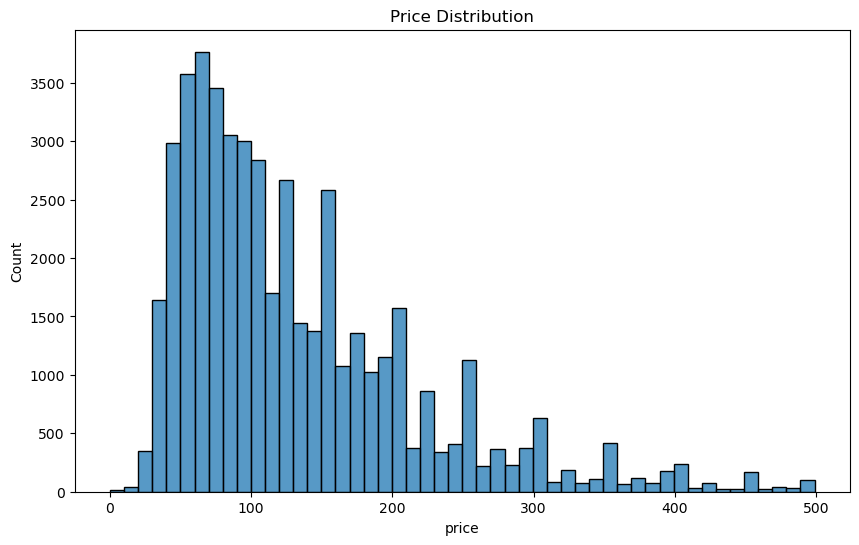

In [12]:
# 6. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['price'], bins=50)
plt.title('Price Distribution')
plt.show()

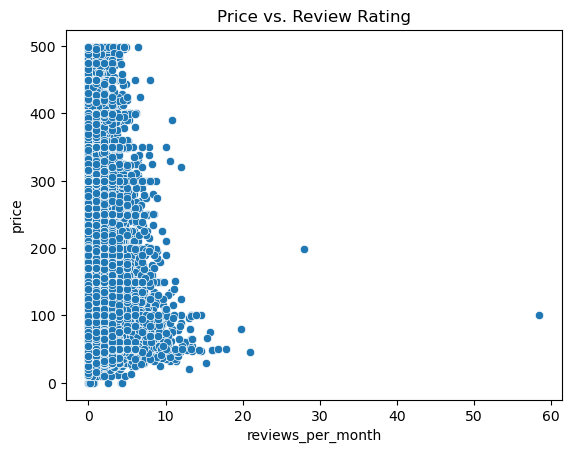

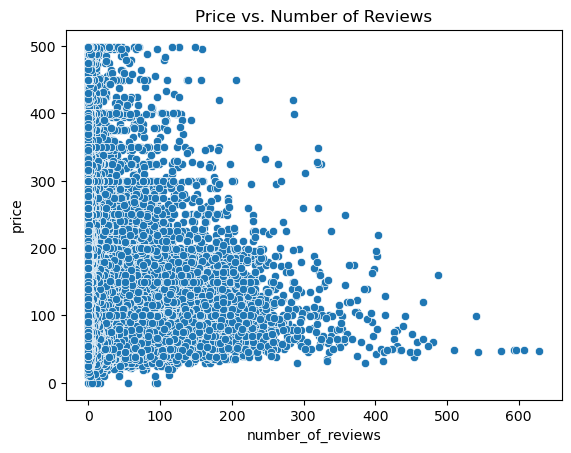

In [13]:
#Impact of Rating and Reviews
sns.scatterplot(x='reviews_per_month', y='price', data=df) # Assuming 'review_scores_rating' is the rating column
plt.title('Price vs. Review Rating')
plt.show()

if 'number_of_reviews' in df.columns:
  sns.scatterplot(x='number_of_reviews', y='price', data=df)
  plt.title('Price vs. Number of Reviews')
  plt.show()

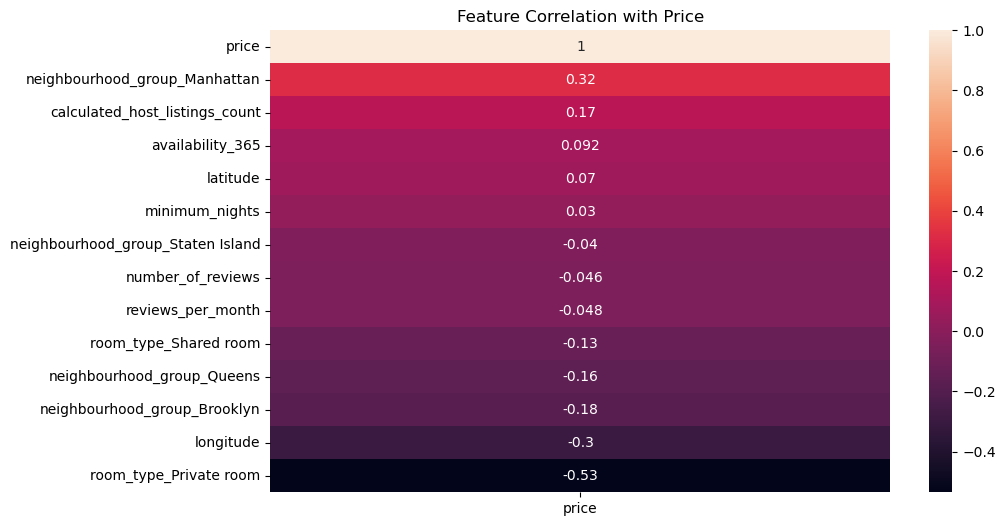

In [14]:
# Correlation with price
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr()[['price']].sort_values(by='price', ascending=False), annot=True)
plt.title('Feature Correlation with Price')
plt.show()

In [15]:
# 7. Feature Selection and Model Training
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
# XGBoost Regression
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [18]:
# 8. Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("XGBoost Regression R2 Score:", r2_score(y_test, y_pred_xgb))

Linear Regression R2 Score: 0.417640244015016
XGBoost Regression R2 Score: 0.5387229919433594


In [19]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("XGBoost Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Linear Regression RMSE: 64.56949582049984
XGBoost Regression RMSE: 57.46622028857888


In [20]:
# 9. Conclusion & Recommendation
# Print a few sample predictions
comparison = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Linear Regression": y_pred_lr[:10],
    "XGBoost": y_pred_xgb[:10]
})
print("\nSample Predictions Comparison:\n", comparison)


Sample Predictions Comparison:
    Actual  Linear Regression     XGBoost
0     250         190.861915  196.397095
1      66          88.258116   71.657242
2      75         154.275147  126.587395
3     165         203.163283  232.626801
4     117         208.663197  240.298401
5     165         149.469966  151.616577
6     499         209.516607  224.183212
7      76          82.607178   67.887505
8      75          66.947528   57.199200
9     120         157.220234  139.476608


In [21]:
# Price recommendations could be provided based on location and room type average
avg_prices = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print("\nAverage Price Recommendations:")
print(avg_prices)


Average Price Recommendations:
   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  121.480000
1                Bronx     Private room   60.595679
2                Bronx      Shared room   47.254237
3             Brooklyn  Entire home/apt  158.278928
4             Brooklyn     Private room   71.113402
5             Brooklyn      Shared room   48.890777
6            Manhattan  Entire home/apt  201.285680
7            Manhattan     Private room  102.435092
8            Manhattan      Shared room   82.334737
9               Queens  Entire home/apt  137.880367
10              Queens     Private room   66.892061
11              Queens      Shared room   46.989691
12       Staten Island  Entire home/apt  124.835294
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444
